# 降维

In [1]:
import math

1- math.pow(0.998,10000)

0.999999997979714

## 维度灾难
    1. 大部分点会落在某一维度上
    2. 两点之间的平均距离增大
    3. 模型过拟合风险增大
    4. 不可能为高纬度空间准备足够多的数据集

# 降维主要方法
1. 投影
2. 流型学习

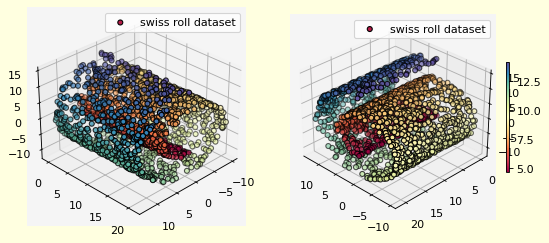

In [40]:
from sklearn.datasets import make_swiss_roll
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import random

X_swiss, t_swiss = make_swiss_roll(n_samples=2000, noise=0.1)

fig = plt.figure(figsize=(12,8),
                 dpi=80,
                 facecolor='lightyellow')
plt.subplots_adjust(wspace=0.2, hspace=0.6)
ax1 = plt.subplot(1,3,1,
                 facecolor='whitesmoke',
                 projection='3d')
ax2 = plt.subplot(1,3,2,
                 facecolor='whitesmoke',
                 projection='3d')

scatter1 = ax1.scatter(X_swiss[:,0],X_swiss[:,1], X_swiss[:,2], 
                     c=t_swiss, cmap=plt.cm.Spectral, 
                     edgecolors='black', label='swiss roll dataset')
scatter2 = ax2.scatter(X_swiss[:,0],X_swiss[:,1], X_swiss[:,2], 
                     c=t_swiss, cmap=plt.cm.Spectral, 
                     edgecolors='black', label='swiss roll dataset')

ax1.legend()
ax2.legend()
plt.colorbar(scatter, ax=ax2, 
             orientation='vertical', fraction=0.01,
             shrink=0.5, aspect=50)
ax1.view_init(elev=30, azim=45)
ax2.view_init(elev=30, azim=135)

## 主成分分析 PCA

### 原理 - 非奇异分解
\* 相当于X有$n$个数据点，每个数据点有$n$个属性
1. 找到一个线性变换
$$
    Y_{(n,n)} = a_{(n,n)}^{T}X_{(n,n)}
$$
使得
$$
    Var(Y) = a^{T}\Sigma a 
$$
\* 其中$\Sigma$是随机变量$X$的协方差矩阵
达到最大，相当于在该线性变换方向上延展了足够多的数据
2. 最优化问题描述
$$
    \begin{array}{ll}
    \mathop{\arg\max}\limits_{a_{1}} & a_{1}^{T}\Sigma a_{1} \\
    s.t. & a_{1}^{T} a_{1} = 1
    \end{array}
$$
其余维度的变换向量为
$$
    \begin{array}{ll}
    \mathop{\arg\max}\limits_{a_{k}} & a_{k}^{T}\Sigma a_{k} \\
    s.t. & a_{k}^{T} a_{k} = 1 \\ 
     \space & a_{k-1}^{T}\Sigma a_{k} \ne 0
    \end{array}
$$
3. 证明可得协方差矩阵的特征向量矩阵即为$a$矩阵，每个维度对应的最大值即为相应特征向量的特征值
4. 矩阵的特征值与特征向量
$$
    \exists \vec\nu, \space s.t. A\vec\nu = \lambda \vec\nu
$$
则$\nu$为矩阵$A$的特征向量，$\lambda$为矩阵$A$的特征值

### 原理 - 奇异分解SVD
\* 适用于非方阵，即数据点数量与数据特征数量不匹配的状况
$$
   A = U \Sigma V^{T}
$$
\* 其中$ V^{T} $是$A^{T}A$的特征矩阵，也是PCA中的维度矩阵<br>
\* 在np.linalg.svd中 s即为特征值向量，V即为特征矩阵转置$ V^{T} $

1. 在进行PCA之前，数据需要进行中心化处理
2. U,s,V = np.linalg.svd()
3. 最后进行维度转换时公式为
$$
    \hat A_{(m*k)} = A_{(m*n)} \cdot V_{(k*n)}^{T}
$$
\* $m$为数据点数量，$n$为原特征数量，$k$为新特征数量
\* 注意，$V^{T}$的特征向量是行向量

#### 使用np内置svd

In [60]:
X_swiss_centered = X_swiss - X_swiss.mean(axis=0)
U_swiss, s_swiss, V_swiss = np.linalg.svd(X_swiss_centered)
c1 = V_swiss.T[:,0]
c2 = V_swiss.T[:,1]
print(c1)
print(c2)

[-0.53498621 -0.06641496 -0.84224629]
[ 0.84421615 -0.08095953 -0.52985341]


In [82]:
def plot_pca(X, t):
    fig = plt.figure(figsize=(20,6),
                     dpi=80,
                     facecolor='lightyellow')
    plt.subplots_adjust(wspace=0.2, hspace=0.6)
    ax1 = plt.subplot(1,3,1,
                     facecolor='whitesmoke')
    ax2 = plt.subplot(1,3,2,
                     facecolor='whitesmoke')

    scatter1 = ax1.scatter(X[:,0],X[:,1], 
                         c=t, cmap=plt.cm.Spectral, 
                         edgecolors='black', label='swiss roll dataset')
    scatter2 = ax2.scatter(X[:,0],X[:,1], 
                         c=t, cmap=plt.cm.Spectral, 
                         edgecolors='black', label='swiss roll dataset')

    ax1.legend()
    ax2.legend()
    plt.colorbar(scatter, ax=ax2, 
                 orientation='vertical', fraction=0.01,
                 shrink=0.5, aspect=50)

(3, 2)
(2000, 3)
68.56%


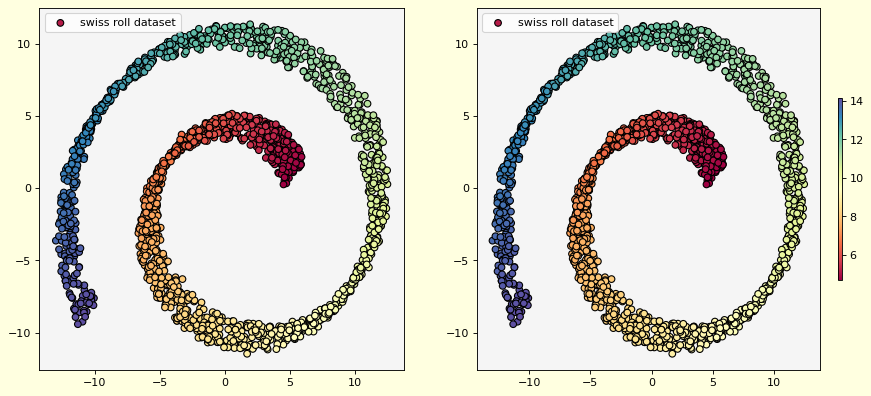

In [83]:
W2_swiss = V_swiss.T[:,:2]
print(W2_swiss.shape)
print(X_swiss_centered.shape)
X2D_swiss = X_swiss_centered.dot(W2_swiss)
percentile = np.sum(s_swiss[:2],axis=0)*100/np.sum(s_swiss,axis=0)
print('%.2f%%'% percentile)
plot_pca(X2D_swiss, t_swiss)

#### 使用sci-kit learn

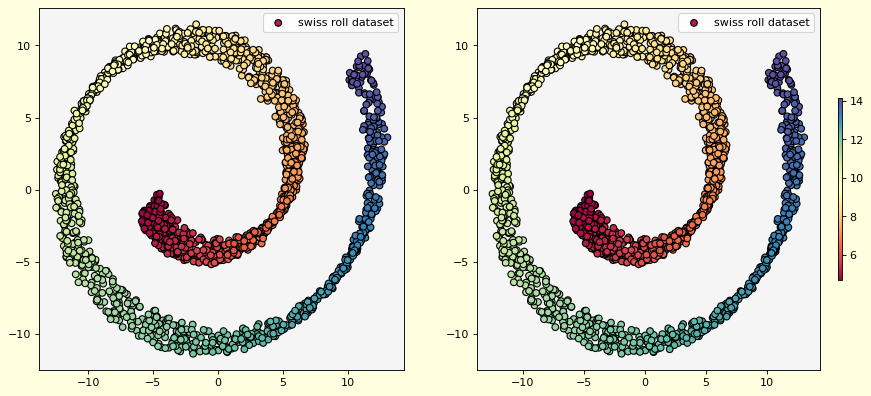

In [84]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X_swiss)

plot_pca(X2D, t_swiss)

In [85]:
pca.components_.T

array([[ 0.53498621, -0.84421615],
       [ 0.06641496,  0.08095953],
       [ 0.84224629,  0.52985341]])

#### 方差解释率

In [86]:
pca.explained_variance_ratio_

array([0.38393033, 0.32050557])

In [89]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>=0.95)+1
d

1

### 原数据恢复
1. 转换 pca.fit_transform()
2. 恢复 pca.inverse_transform()

### 核PCA
将数据首先通过核函数映射到高维然后再通过PCA进行降维处理

In [103]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_swiss_rbf_reduced = rbf_pca.fit_transform(X_swiss)

sigmoid_pca = KernelPCA(n_components=2, kernel='sigmoid')
X_swiss_sigmoid_reduced = sigmoid_pca.fit_transform(X_swiss)

linear_pca = KernelPCA(n_components=2, kernel='poly', degree=3, coef0=1)
X_swiss_linear_reduced = linear_pca.fit_transform(X_swiss)

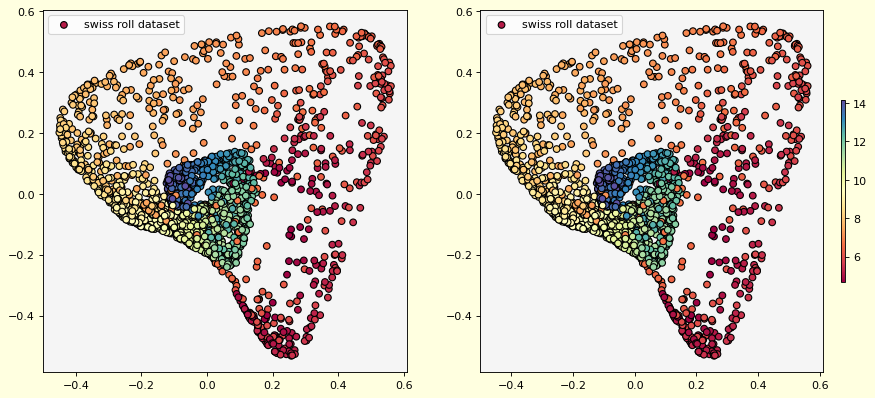

In [104]:
plot_pca(X_swiss_rbf_reduced, t_swiss)

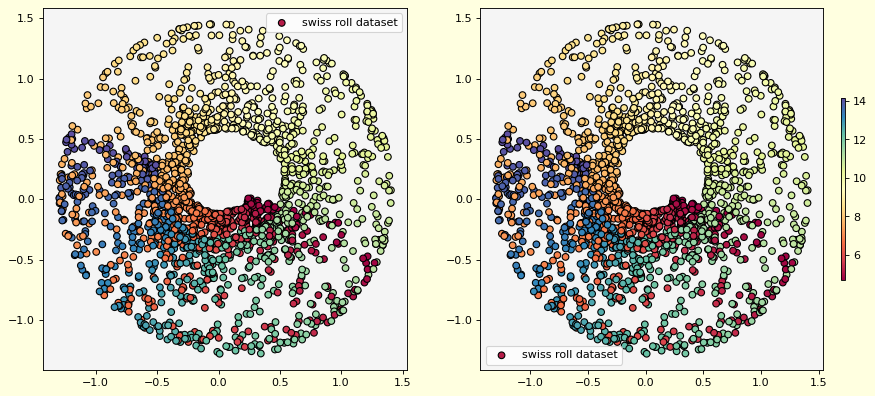

In [105]:
plot_pca(X_swiss_sigmoid_reduced, t_swiss)

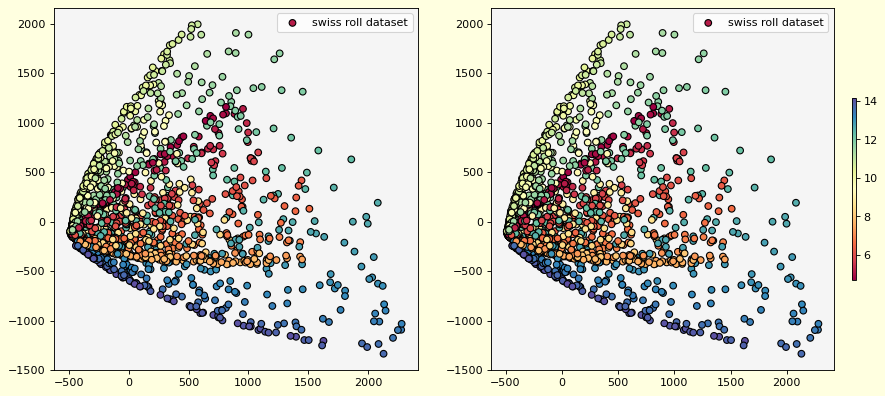

In [106]:
plot_pca(X_swiss_linear_reduced, t_swiss)

In [121]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression

clf = Pipeline([
    ('kpca',KernelPCA(n_components=2)),
    ('log_reg',LogisticRegression())
])
param_grid = [{
    'kpca__gamma': np.linspace(0.03, 0.05, 10),
    'kpca__kernel': ['rbf','sigmoid']
}]
grid_search = GridSearchCV(clf, param_grid = param_grid, cv=3)
grid_search.fit(X_swiss, t_swiss.astype(np.int32))

print(grid_search.best_params_)

{'kpca__gamma': 0.03, 'kpca__kernel': 'sigmoid'}


In [123]:
pca_swiss_res = grid_search.cv_results_

for score,params in zip(pca_swiss_res['mean_test_score'], pca_swiss_res['params']):
    print(score, params)

0.6014927971449712 {'kpca__gamma': 0.03, 'kpca__kernel': 'rbf'}
0.7610083846965406 {'kpca__gamma': 0.03, 'kpca__kernel': 'sigmoid'}
0.6064925495210353 {'kpca__gamma': 0.03222222222222222, 'kpca__kernel': 'rbf'}
0.7575086330708519 {'kpca__gamma': 0.03222222222222222, 'kpca__kernel': 'sigmoid'}
0.6084945515230372 {'kpca__gamma': 0.034444444444444444, 'kpca__kernel': 'rbf'}
0.7555096325711018 {'kpca__gamma': 0.034444444444444444, 'kpca__kernel': 'sigmoid'}
0.6059912986449718 {'kpca__gamma': 0.03666666666666667, 'kpca__kernel': 'rbf'}
0.7545101323212268 {'kpca__gamma': 0.03666666666666667, 'kpca__kernel': 'sigmoid'}
0.6064865465165316 {'kpca__gamma': 0.03888888888888889, 'kpca__kernel': 'rbf'}
0.7495103799451625 {'kpca__gamma': 0.03888888888888889, 'kpca__kernel': 'sigmoid'}
0.6029882956419689 {'kpca__gamma': 0.04111111111111111, 'kpca__kernel': 'rbf'}
0.7460113786950369 {'kpca__gamma': 0.04111111111111111, 'kpca__kernel': 'sigmoid'}
0.5979945462704084 {'kpca__gamma': 0.043333333333333335,

### 核PCA原始数据恢复
1. fit_inverse_transform = True
2. 只有上述特征设置为True的时候，KernelPCA才会提供inverse_transform()方法
3. inverse_transform()方法会直接把PCA转换后矩阵恢复到PCA转换前的样子

In [126]:
from sklearn.metrics import mean_squared_error

sigmoid_pca_pr = KernelPCA(n_components=2, 
                           kernel='sigmoid',
                           gamma=0.03, 
                           fit_inverse_transform=True)
X_swiss_pr = sigmoid_pca_pr.fit_transform(X_swiss)
X_swiss_pr_preimage = sigmoid_pca_pr.inverse_transform(X_swiss_pr)
mean_squared_error(X_swiss, X_swiss_pr_preimage)

19.532243082566843

## 局部线性嵌入 LLE - 流型学习法
1. 寻找与训练实例最近点之间的线性关系
2. 寻找能够最好保存局部关系训练集的低维表示

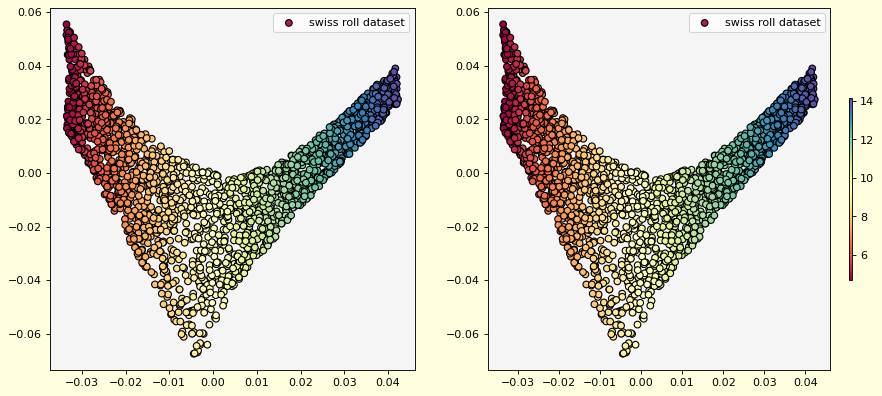

In [127]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_swiss_lle_reduced = lle.fit_transform(X_swiss)

plot_pca(X_swiss_lle_reduced, t_swiss)